In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import scirpy as ir
from matplotlib import pyplot as plt
import glob
import collections

In [2]:
metadata = pd.read_csv("/home/srashmi/Documents/tonsil_atlas_citeseq_vdj_20210505/01-cellranger_mapping/data/tonsil_atlas_metadata.csv")
df = pd.DataFrame(metadata, columns= ['subproject', 'gem_id']).drop_duplicates()
subproject_gem_id_list = df.values.tolist()
print(subproject_gem_id_list)

[['BCLLATLAS_33', 'mLuLpVxi_v0fLyotc'], ['BCLLATLAS_33', 'ifZOgenn_TpMNTvBa'], ['BCLLATLAS_38', 'WToIzInl_LudU7hVX'], ['BCLLATLAS_38', 'B20O1bh7_VmM99YZJ'], ['BCLLATLAS_38', 'rdFRFhrU_ZdYeOZlf'], ['BCLLATLAS_40', 'CfdzDgHe_IMOTbrIP'], ['BCLLATLAS_40', 'uqJAc4r9_BYScOzxA'], ['BCLLATLAS_40', 'ujxNn2kq_lG2VLlYd'], ['BCLLATLAS_40', 'pseMjZsU_qgZNOhOQ'], ['BCLLATLAS_40', 'LxBTpkPO_8TcNpBg4'], ['BCLLATLAS_46', 'SOJZt9kY_qpnv20QN'], ['BCLLATLAS_46', 'HjqdPU0E_aGDmEY5F'], ['BCLLATLAS_46', 'XV1SLOR2_HRF5D9A3'], ['BCLLATLAS_46', 'BZEECBEG_GXkc6Q1y'], ['BCLLATLAS_46', 'KETfaLdx_Ub1mtE13']]


In [3]:
gex_file="objects/CD8_tonsil_cite_seq_annotated.h5ad"	
adata = sc.read_h5ad(gex_file)
adata.var_names_make_unique()
cd4_pos_cells = list(adata.obs.index)

In [4]:
adatas_tcr = []
for sample_info_list in subproject_gem_id_list:
	subproject = sample_info_list[0]
	gem_id = sample_info_list[1]
	sample = subproject + "_" + gem_id    
	tcr_file='/home/srashmi/Documents/tonsil_atlas_citeseq_vdj_20210505/01-cellranger_mapping/projects/'+subproject+'/jobs/'+gem_id+'/'+gem_id+'/outs/per_sample_outs/'+gem_id+'/vdj_t/filtered_contig_annotations.csv'	
	ad = pd.read_csv(tcr_file)
	ad["barcode"] = sample + "_" + ad["barcode"]
	adatas_tcr.append(ad)

adatas_tcr = pd.concat(adatas_tcr)
adatas_tcr = adatas_tcr[adatas_tcr['barcode'].isin(cd4_pos_cells)]
adatas_tcr.shape
adatas_tcr.to_csv("tcr_bcll.csv")

In [5]:
adata_tcr = ir.io.read_10x_vdj("tcr_bcll.csv")

... storing 'IR_VJ_1_cdr3' as categorical
... storing 'IR_VJ_2_cdr3' as categorical
... storing 'IR_VDJ_1_cdr3' as categorical
... storing 'IR_VDJ_2_cdr3' as categorical
... storing 'IR_VJ_1_cdr3_nt' as categorical
... storing 'IR_VJ_2_cdr3_nt' as categorical
... storing 'IR_VDJ_1_cdr3_nt' as categorical
... storing 'IR_VDJ_2_cdr3_nt' as categorical
... storing 'IR_VJ_1_junction_ins' as categorical
... storing 'IR_VJ_2_junction_ins' as categorical
... storing 'IR_VDJ_1_junction_ins' as categorical
... storing 'IR_VDJ_2_junction_ins' as categorical


In [6]:
ir.pp.merge_with_ir(adata, adata_tcr)
adata

... storing 'orig.ident' as categorical
... storing 'sample' as categorical
... storing 'subproject' as categorical
... storing 'gemid' as categorical
... storing 'donor_id' as categorical
... storing 'genotype_based_doublet_flag' as categorical
... storing 'genotype_based_unassigned_flag' as categorical
... storing 'scrublet_predicted_doublet' as categorical
... storing 'inkt_evidence' as categorical
... storing 'mait_evidence' as categorical
... storing 'tcr_flag' as categorical
... storing 'bcr_flag' as categorical
... storing 'Phase' as categorical
... storing 'annotation' as categorical
... storing 'repertoire_flag' as categorical
... storing 'CD8_annotation_level_5' as categorical
... storing 'multi_chain' as categorical


AnnData object with n_obs × n_vars = 1562 × 192
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_ADT', 'nFeature_ADT', 'sample', 'subproject', 'gemid', 'donor_id', 'genotype_based_doublet_flag', 'genotype_based_unassigned_flag', 'scrublet_doublet_scores', 'scrublet_predicted_doublet', 'inkt_evidence', 'mait_evidence', 'tcr_flag', 'bcr_flag', 'percent.mt', 'log10GenesPerUMI', 'S.Score', 'G2M.Score', 'Phase', 'RNA.weight', 'ADT.weight', 'wsnn_res.0.1', 'wsnn_res.0.5', 'wsnn_res.1', 'wsnn_res.1.5', 'wsnn_res.2', 'seurat_clusters', 'annotation', 'annotation_prob', 'UMAP1', 'UMAP2', 'repertoire_flag', 'CD8_annotation_level_5', 'CD8_annotation_probability', 'CD8_UMAP1', 'CD8_UMAP2', 'IR_VJ_1_locus', 'IR_VJ_2_locus', 'IR_VDJ_1_locus', 'IR_VDJ_2_locus', 'IR_VJ_1_cdr3', 'IR_VJ_2_cdr3', 'IR_VDJ_1_cdr3', 'IR_VDJ_2_cdr3', 'IR_VJ_1_cdr3_nt', 'IR_VJ_2_cdr3_nt', 'IR_VDJ_1_cdr3_nt', 'IR_VDJ_2_cdr3_nt', 'IR_VJ_1_expr', 'IR_VJ_2_expr', 'IR_VDJ_1_expr', 'IR_VDJ_2_expr', 'IR_VJ_1_expr_raw', 'I

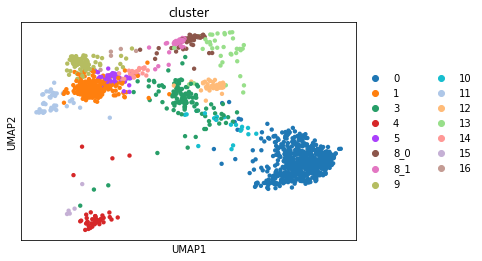

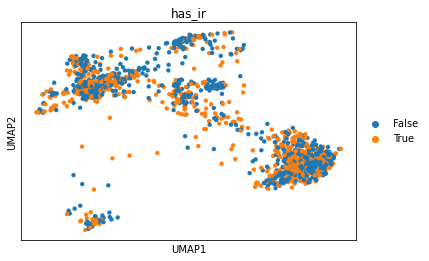

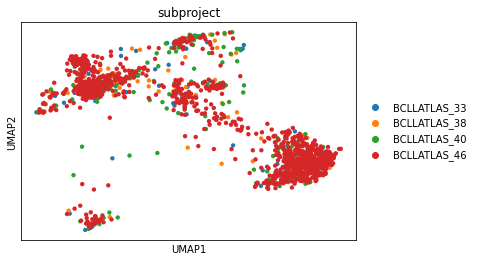

In [7]:
adata.obsm['umap'] = np.array(adata.obs[['CD8_UMAP1', 'CD8_UMAP2']])
adata.obs["cluster"] = adata.obs['CD8_annotation_level_5']
adata.obs['cluster'] = adata.obs['cluster'].astype('category').values
sc.pl.umap(adata, color=["cluster"])
sc.pl.umap(adata, color=["has_ir"])
sc.pl.umap(adata, color=["subproject"])

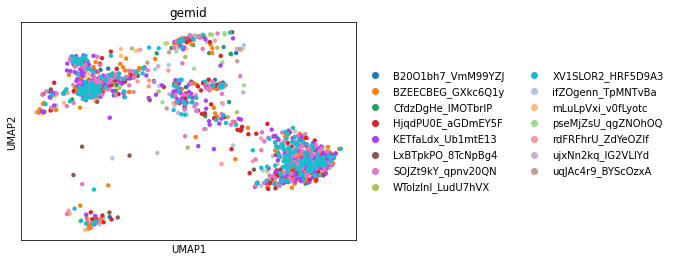

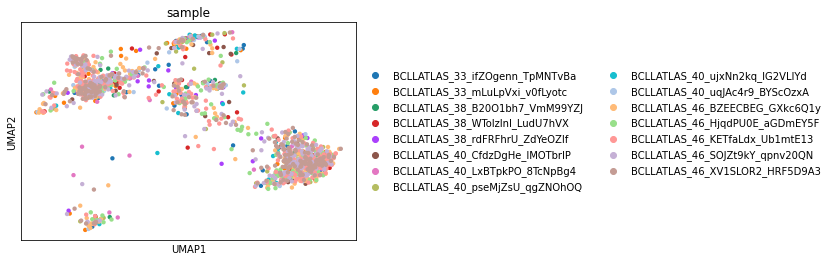

In [8]:
sc.pl.umap(adata, color=["gemid"])
sc.pl.umap(adata, color=["sample"])

... storing 'receptor_type' as categorical
... storing 'receptor_subtype' as categorical
... storing 'chain_pairing' as categorical


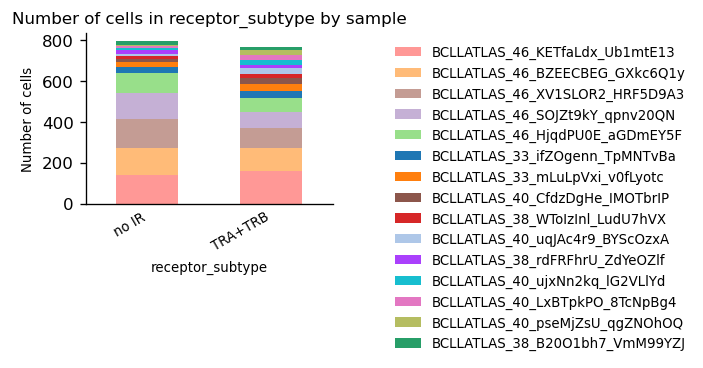

In [9]:
ir.tl.chain_qc(adata)
ir.pl.group_abundance(adata, groupby="receptor_subtype", target_col="sample")
plt.show()

/home/srashmi/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
Trying to set attribute `.obs` of view, copying.
... storing 'receptor_type' as categorical
... storing 'receptor_subtype' as categorical
... storing 'chain_pairing' as categorical


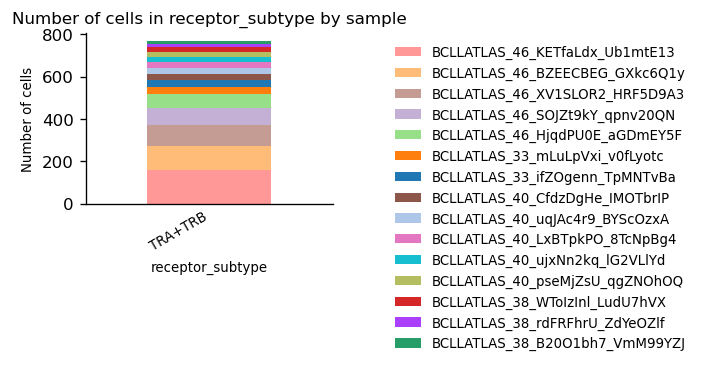

In [10]:
TCR_adata = adata[adata.obs['receptor_type'] == "TCR"]
ir.tl.chain_qc(TCR_adata)
ir.pl.group_abundance(TCR_adata, groupby="receptor_subtype", target_col="sample")
plt.show()

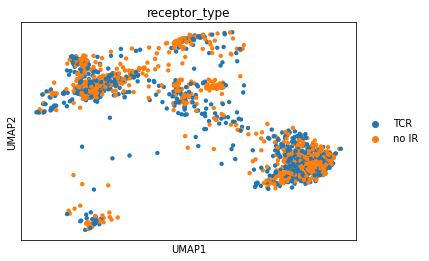

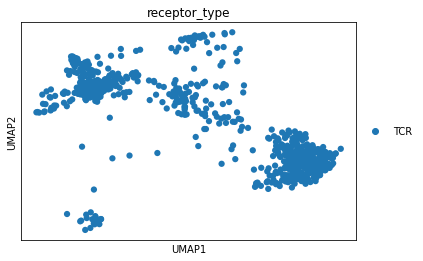

In [11]:
sc.pl.umap(adata, color=['receptor_type'])
sc.pl.umap(TCR_adata, color=['receptor_type'])

In [12]:
print("Total Cells : "+str(adata.obs.shape[0]))
print("Cells with TCR : "+str(TCR_adata.obs.shape[0]))

Total Cells : 1562
Cells with TCR : 767


In [13]:
print(
    "Fraction of cells with more than one pair of TCRs: {:.2f}".format(
        np.sum(
            TCR_adata.obs["chain_pairing"].isin(
                ["extra VJ", "extra VDJ", "two full chains"]
            )
        )
        / TCR_adata.n_obs
    )
)


Fraction of cells with more than one pair of TCRs: 0.12


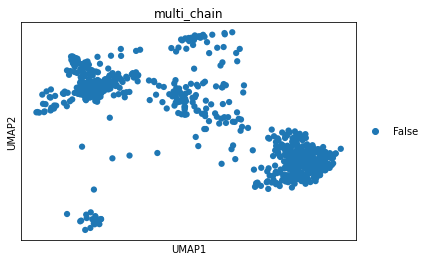

In [14]:
sc.pl.umap(TCR_adata, color="multi_chain")
TCR_adata = TCR_adata[TCR_adata.obs["multi_chain"] != "True", :].copy() #Remove the ones with multi-chain as they can be douplets
plt.show()

In [15]:
ir.pp.ir_neighbors(TCR_adata, receptor_arms="all", dual_ir="primary_only")
ir.tl.define_clonotypes(TCR_adata)
TCR_adata.obs["cluster"] = TCR_adata.obs['cluster']
TCR_adata.obs['cluster'] = TCR_adata.obs['cluster'].astype('category').values

100%|██████████| 2037/2037 [00:00<00:00, 128516.81it/s]


... storing 'clonotype' as categorical


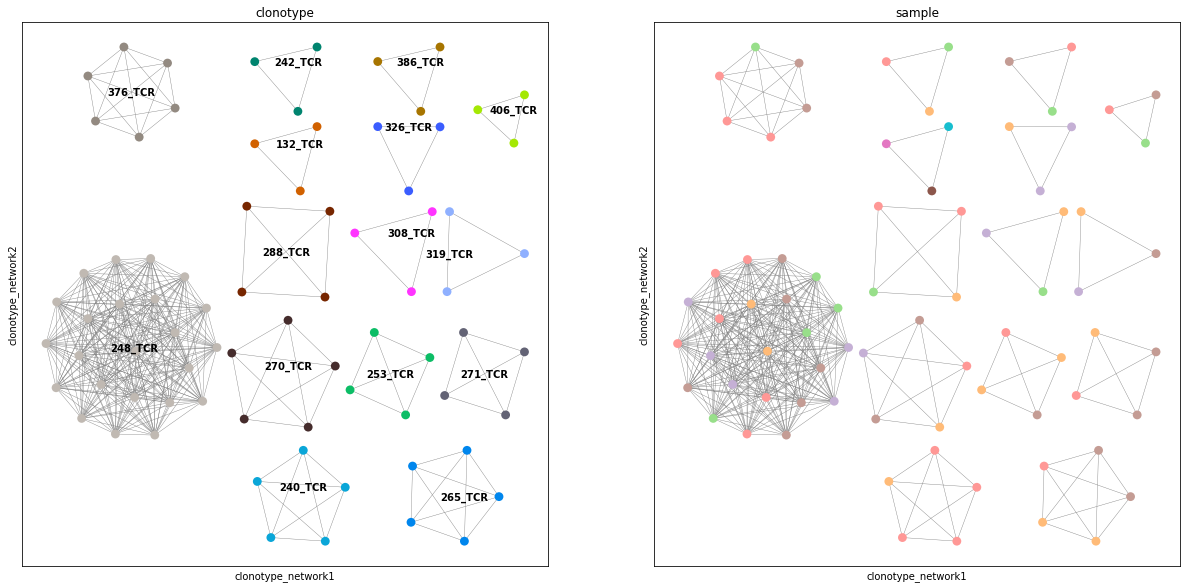

In [16]:
ir.tl.clonotype_network(TCR_adata, min_size=3, sequence = "nt", metric="identity")
ir.pl.clonotype_network(TCR_adata, color=["clonotype", "sample"], legend_loc=["on data", "none"],)
plt.show()

In [17]:
sc.settings.verbosity = 4
ir.pp.ir_neighbors(TCR_adata,metric="alignment",sequence="aa",cutoff=15,receptor_arms="all",dual_ir="all",)
ir.tl.define_clonotype_clusters(TCR_adata, partitions="connected", sequence="aa", metric="alignment", within_group=None)

Initializing IrNeighbors object...
Finished initalizing IrNeighbors object.  (0:00:00)
Computing VJ pairwise distances...
100%|██████████| 78/78 [00:00<00:00, 173.76it/s]
Finished computing VJ pairwise distances. (0:00:00)
Computing VDJ pairwise distances...
100%|██████████| 105/105 [00:00<00:00, 153.91it/s]
Finished computing VDJ pairwise distances. (0:00:00)
Started comstructing VJ coord-dictionary...
100%|██████████| 813/813 [00:00<00:00, 22131.30it/s]
Finished constructing VJ coord-dictionary (0:00:00)
Started comstructing VDJ coord-dictionary...
100%|██████████| 822/822 [00:00<00:00, 41014.48it/s]
Finished constructing VDJ coord-dictionary (0:00:00)
Constructing cell x cell distance matrix...
100%|██████████| 3073/3073 [00:00<00:00, 135278.83it/s]
Finished constructing cell x cell distance matrix.  (0:00:00)
    Started converting distances to connectivities. 
    Finished converting distances to connectivities.  (0:00:00)


... storing 'ct_cluster_aa_alignment' as categorical


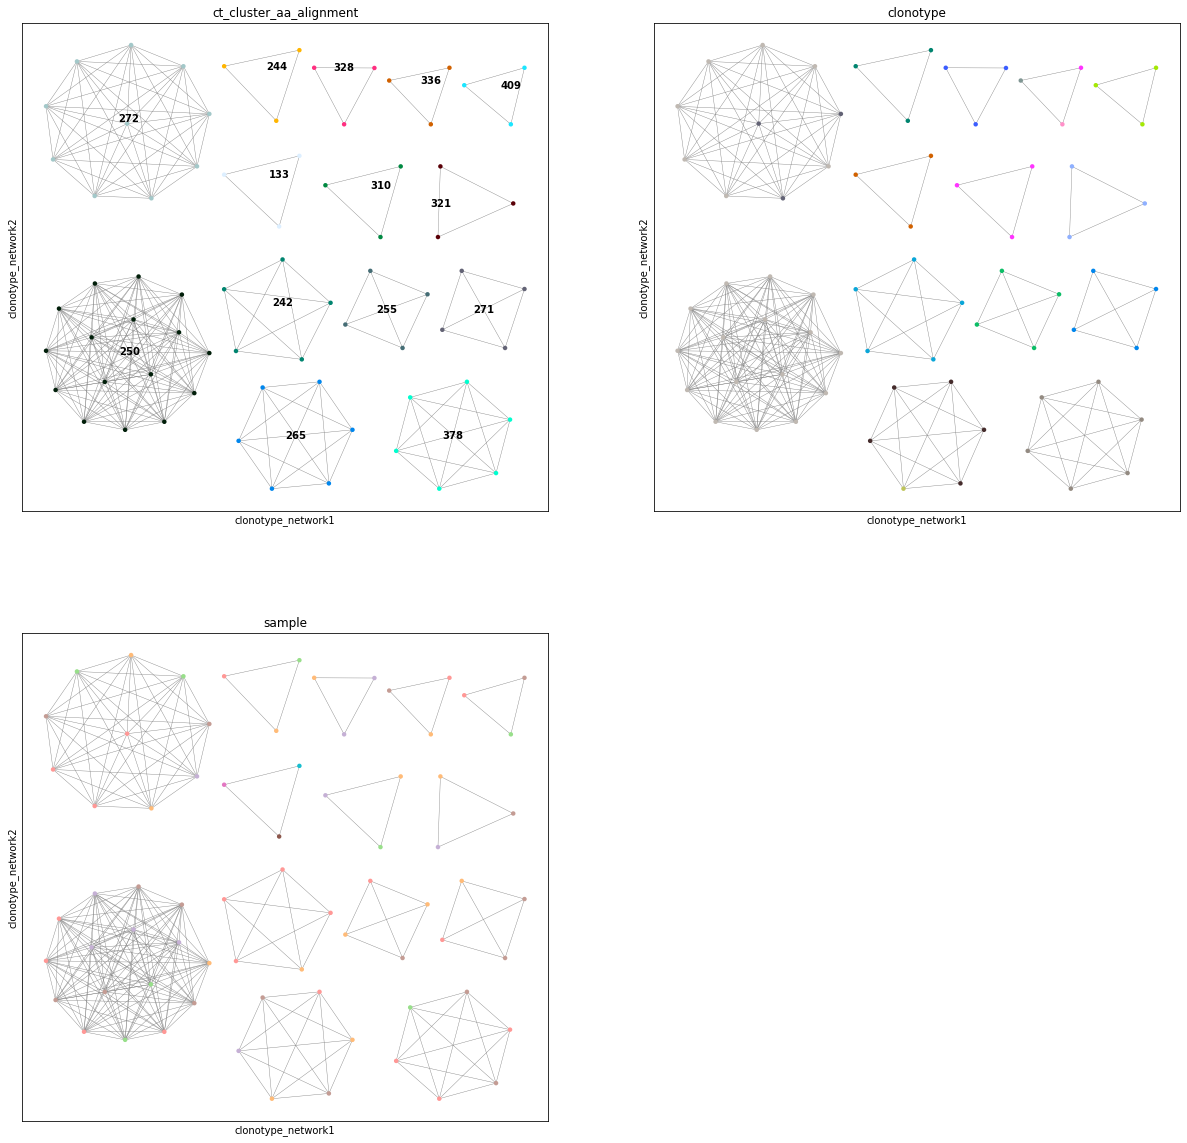

In [18]:
ir.tl.clonotype_network(TCR_adata, min_size=3, sequence="aa", metric="alignment")
ir.pl.clonotype_network(
    TCR_adata,
    color=["ct_cluster_aa_alignment", "clonotype", "sample"],
    size=80,
    ncols=2,
    legend_loc=["on data", "none", "none"]
)
plt.show()

In [19]:
top_cluster=collections.Counter(TCR_adata.obs["ct_cluster_aa_alignment"].to_list()).most_common(1)[0]
TCR_adata.obs.loc[TCR_adata.obs["ct_cluster_aa_alignment"] == top_cluster[0],["IR_VJ_1_cdr3","IR_VJ_2_cdr3","IR_VDJ_1_cdr3","IR_VDJ_2_cdr3","receptor_subtype",],]

,IR_VJ_1_cdr3,IR_VJ_2_cdr3,IR_VDJ_1_cdr3,IR_VDJ_2_cdr3,receptor_subtype
BCLLATLAS_46_BZEECBEG_GXkc6Q1y_ACTTTCAAGGTGATAT-1,CAVRPEGAGNMLTF,None,CASSQDPGGNYGYTF,None,TRA+TRB
BCLLATLAS_46_HjqdPU0E_aGDmEY5F_GATCTAGTCATGTAGC-1,CAVRPEGAGNMLTF,None,CASSQDPGGNYGYTF,None,TRA+TRB
BCLLATLAS_46_HjqdPU0E_aGDmEY5F_TCAGCAATCCGAATGT-1,CAVRPEGAGNMLTF,None,CASSQDPGGNYGYTF,None,TRA+TRB
BCLLATLAS_46_KETfaLdx_Ub1mtE13_AGTGGGACACTCGACG-1,CAVRPEGAGNMLTF,None,CASSQDPGGNYGYTF,None,TRA+TRB
BCLLATLAS_46_KETfaLdx_Ub1mtE13_GCTCCTAGTCATCCCT-1,CAVRPEGAGNMLTF,None,CASSQDPGGNYGYTF,None,TRA+TRB
BCLLATLAS_46_KETfaLdx_Ub1mtE13_TCACAAGTCAGTACGT-1,CAVRPEGAGNMLTF,None,CASSQDPGGNYGYTF,None,TRA+TRB
BCLLATLAS_46_KETfaLdx_Ub1mtE13_TCTATTGGTAAAGTCA-1,CAVRPEGAGNMLTF,None,CASSQDPGGNYGYTF,None,TRA+TRB
BCLLATLAS_46_SOJZt9kY_qpnv20QN_AACTCTTAGAGGTAGA-1,CAVRPEGAGNMLTF,None,CASSQDPGGNYGYTF,None,TRA+TRB
BCLLATLAS_46_SOJZt9kY_qpnv20QN_GACAGAGGTAATCGTC-1,CAVRPEGAGNMLTF,None,CASSQDPGGNYGYTF,None,TRA+TRB
BCLLATLAS_46_SOJZt9kY_qpnv20QN_GCCTCTAGTTTAGGAA-1,CAVRPEGAGNMLTF,None,CASSQDPGGNYGYTF,None,TRA+TRB


In [20]:
ir.tl.define_clonotype_clusters(TCR_adata,sequence="aa",metric="alignment",same_v_gene="primary_only",key_added="ct_cluster_aa_alignment_same_v",)

In [21]:
# find clonotypes with more than one `clonotype_same_v`
ct_different_v = TCR_adata.obs.groupby("ct_cluster_aa_alignment").apply(lambda x: x["ct_cluster_aa_alignment_same_v"].unique().size > 1)
ct_different_v = ct_different_v[ct_different_v].index.values
ct_different_v

['272', '509']
Categories (687, object): ['0', '1', '2', '3', ..., '683', '684', '685', '686']

In [22]:
# Display the first 2 clonotypes with different v genes
TCR_adata.obs.loc[TCR_adata.obs["ct_cluster_aa_alignment"].isin(ct_different_v[:2]),["ct_cluster_aa_alignment","ct_cluster_aa_alignment_same_v","IR_VJ_1_v_gene","IR_VDJ_1_v_gene",],].sort_values("ct_cluster_aa_alignment").drop_duplicates().reset_index(drop=True)

,ct_cluster_aa_alignment,ct_cluster_aa_alignment_same_v,IR_VJ_1_v_gene,IR_VDJ_1_v_gene
0,272,272_TRAV21_TRBV4-2_TCR,TRAV21,TRBV4-2
1,272,272_TRAV21_TRBV5-4_TCR,TRAV21,TRBV5-4
2,509,509_nan_TRBV10-3_TCR,NaN,TRBV10-3
3,509,509_nan_TRBV24-1_TCR,NaN,TRBV24-1


... storing 'ct_cluster_aa_alignment_same_v' as categorical
... storing 'clonal_expansion' as categorical


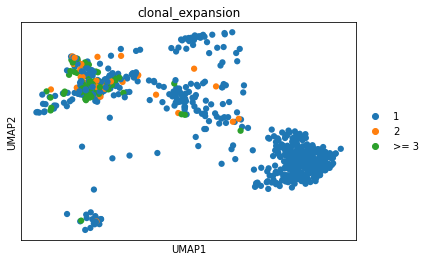

In [23]:
ir.tl.clonal_expansion(TCR_adata)
sc.pl.umap(TCR_adata, color=["clonal_expansion"])

<AxesSubplot:>

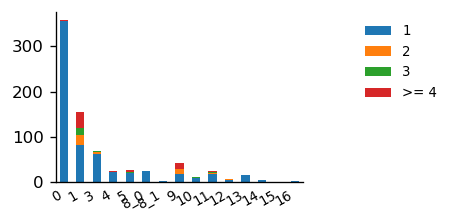

In [24]:
ir.pl.clonal_expansion(TCR_adata, groupby="cluster", clip_at=4, normalize=False)

<AxesSubplot:>

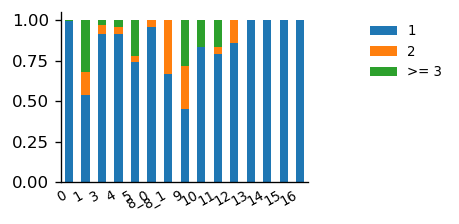

In [25]:
ir.pl.clonal_expansion(TCR_adata, "cluster")

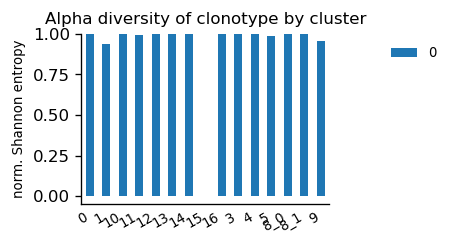

In [26]:
ax = ir.pl.alpha_diversity(TCR_adata, groupby="cluster")

<AxesSubplot:title={'center':'Number of cells in clonotype by cluster'}, xlabel='clonotype', ylabel='Number of cells'>

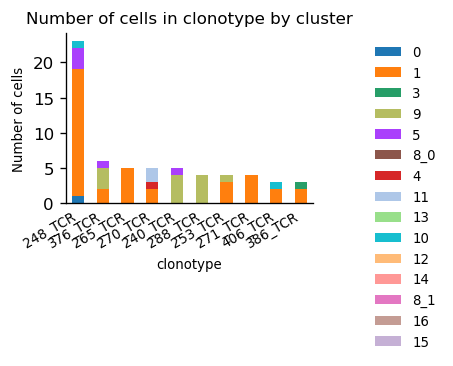

In [27]:
ir.pl.group_abundance(TCR_adata, groupby="clonotype",target_col="cluster", max_cols=10)

<AxesSubplot:title={'center':'Fraction of cluster in each clonotype'}, xlabel='clonotype', ylabel='Fraction of cells in sample'>

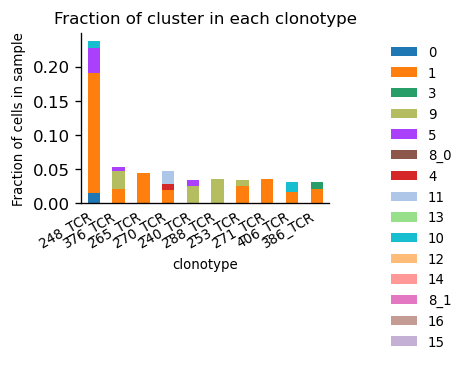

In [28]:
ir.pl.group_abundance(TCR_adata, groupby="clonotype",target_col="cluster", max_cols=10, normalize="sample")

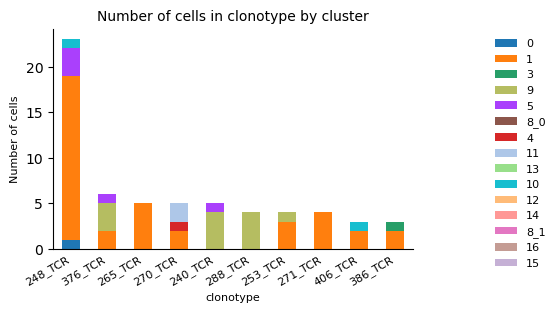

In [29]:
plot = ir.pl.group_abundance(TCR_adata, groupby="clonotype",target_col="cluster", max_cols=10, fig_kws={"dpi": 100})
plot.figure.savefig("clonotype_across_clusters.png")

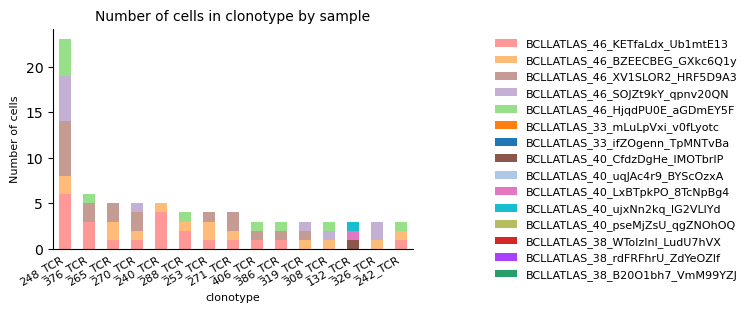

In [30]:
ax = ir.pl.group_abundance(TCR_adata, groupby="clonotype", target_col="sample", max_cols=15, fig_kws={"dpi": 100})

<AxesSubplot:title={'center':'Fraction of has_ir in each IR_VJ_1_v_gene'}, xlabel='IR_VJ_1_v_gene', ylabel='Fraction of cells in has_ir'>

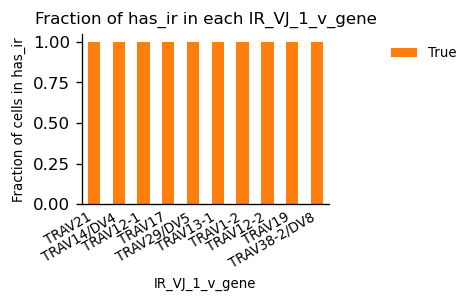

In [31]:
ir.pl.group_abundance(TCR_adata, groupby="IR_VJ_1_v_gene", normalize=True, max_cols=10)

/home/srashmi/anaconda3/lib/python3.7/site-packages/anndata/compat/__init__.py:215: FutureWarning: During AnnData slicing, found matrix at .uns['ir_neighbors_nt_identity']['connectivities'] that happens to be dimensioned at n_obs×n_obs (767×767).

These matrices should now be stored in the .obsp attribute.
This slicing behavior will be removed in anndata 0.8.
  FutureWarning,
/home/srashmi/anaconda3/lib/python3.7/site-packages/anndata/compat/__init__.py:215: FutureWarning: During AnnData slicing, found matrix at .uns['ir_neighbors_nt_identity']['distances'] that happens to be dimensioned at n_obs×n_obs (767×767).

These matrices should now be stored in the .obsp attribute.
This slicing behavior will be removed in anndata 0.8.
  FutureWarning,
/home/srashmi/anaconda3/lib/python3.7/site-packages/anndata/compat/__init__.py:215: FutureWarning: During AnnData slicing, found matrix at .uns['ir_neighbors_aa_alignment']['connectivities'] that happens to be dimensioned at n_obs×n_obs (767×767).

<AxesSubplot:title={'center':'Fraction of IR_VDJ_1_v_gene in each cluster'}, xlabel='cluster', ylabel='Fraction of cells in IR_VDJ_1_v_gene'>

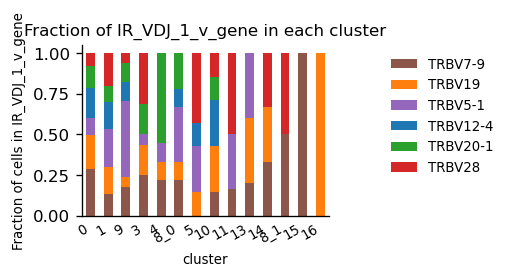

In [32]:
all_gene=TCR_adata.obs["IR_VDJ_1_v_gene"].to_list()
gene_list=[t[0] for t in collections.Counter(all_gene).most_common(6) if str(t[0]) != 'nan']

ir.pl.group_abundance(TCR_adata[TCR_adata.obs["IR_VDJ_1_v_gene"].isin(gene_list),:,],groupby="cluster",target_col="IR_VDJ_1_v_gene",normalize=True,)

<AxesSubplot:>

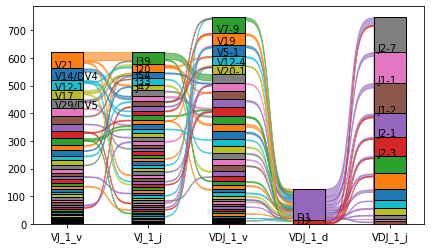

In [33]:
ir.pl.vdj_usage(TCR_adata, full_combination=False, max_segments=None, max_ribbons=30)

['248_TCR', '376_TCR', '270_TCR', '240_TCR', '265_TCR', '253_TCR']


<AxesSubplot:>

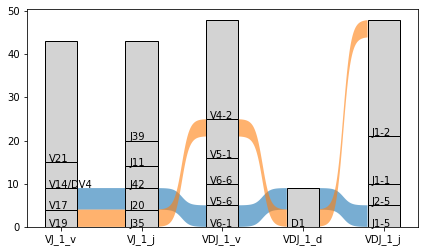

In [34]:
clonotype_list = TCR_adata.obs[TCR_adata.obs["clonal_expansion"] == ">= 3"].sort_values(by=['clonotype_size'], ascending=False)['clonotype'].drop_duplicates().head(6).tolist()
print(clonotype_list)
ir.pl.vdj_usage(TCR_adata[TCR_adata.obs["clonotype"].isin(clonotype_list), :],max_ribbons=None,max_segments=30,)

<AxesSubplot:title={'center':'Spectratype of IR_VJ_1_cdr3 by cluster'}, xlabel='IR_VJ_1_cdr3 length', ylabel='Number of cells'>

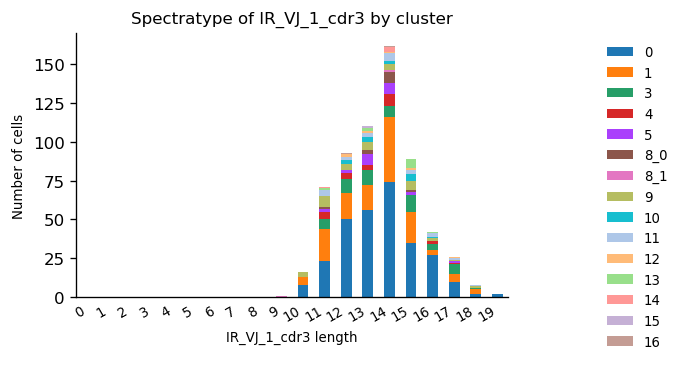

In [35]:
ir.pl.spectratype(TCR_adata, color="cluster", viztype="bar", fig_kws={"dpi": 120})

/home/srashmi/anaconda3/lib/python3.7/site-packages/scirpy/_plotting/base.py:256: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(order)


<AxesSubplot:title={'center':'Spectratype of IR_VJ_1_cdr3 by cluster'}, xlabel='IR_VJ_1_cdr3 length'>

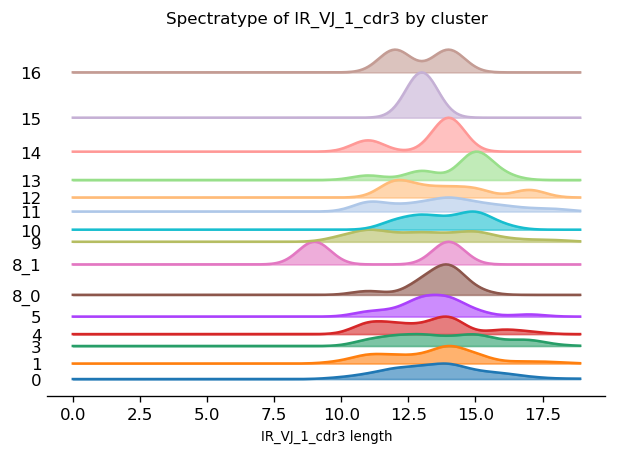

In [36]:
ir.pl.spectratype(TCR_adata,color="cluster",viztype="curve",curve_layout="shifted",fig_kws={"dpi": 120},kde_kws={"kde_norm": False},)

/home/srashmi/anaconda3/lib/python3.7/site-packages/anndata/compat/__init__.py:215: FutureWarning: During AnnData slicing, found matrix at .uns['ir_neighbors_nt_identity']['connectivities'] that happens to be dimensioned at n_obs×n_obs (767×767).

These matrices should now be stored in the .obsp attribute.
This slicing behavior will be removed in anndata 0.8.
  FutureWarning,
/home/srashmi/anaconda3/lib/python3.7/site-packages/anndata/compat/__init__.py:215: FutureWarning: During AnnData slicing, found matrix at .uns['ir_neighbors_nt_identity']['distances'] that happens to be dimensioned at n_obs×n_obs (767×767).

These matrices should now be stored in the .obsp attribute.
This slicing behavior will be removed in anndata 0.8.
  FutureWarning,
/home/srashmi/anaconda3/lib/python3.7/site-packages/anndata/compat/__init__.py:215: FutureWarning: During AnnData slicing, found matrix at .uns['ir_neighbors_aa_alignment']['connectivities'] that happens to be dimensioned at n_obs×n_obs (767×767).

<AxesSubplot:title={'center':'Spectratype of IR_VDJ_1_cdr3 by IR_VDJ_1_v_gene'}, xlabel='IR_VDJ_1_cdr3 length', ylabel='Fraction of cells in sample'>

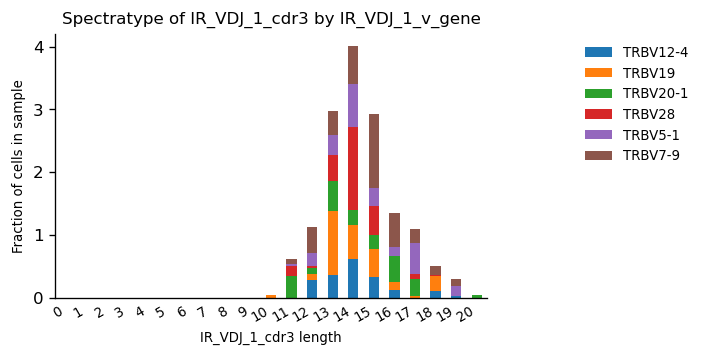

In [37]:
ir.pl.spectratype(TCR_adata[TCR_adata.obs["IR_VDJ_1_v_gene"].isin(gene_list),:,],cdr3_col="IR_VDJ_1_cdr3",color="IR_VDJ_1_v_gene",normalize="sample",fig_kws={"dpi": 120},)

In [38]:
TCR_adata.obs["site"] = TCR_adata.obs["sample"].str.slice(stop=-1)

... storing 'site' as categorical


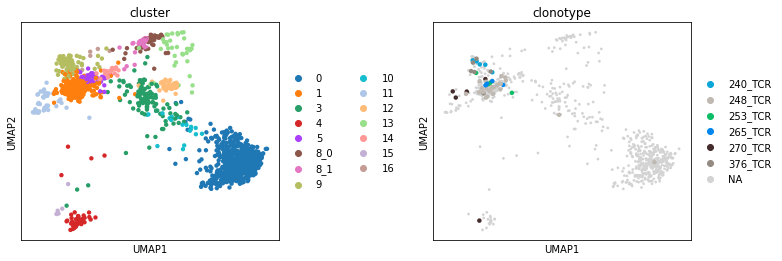

In [39]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), gridspec_kw={"wspace": 0.6})
sc.pl.umap(adata, color="cluster", ax=ax1, show=False)

sc.pl.umap(TCR_adata,color="clonotype",groups=clonotype_list,ax=ax2,size=[80 if c in clonotype_list else 30 for c in TCR_adata.obs["clonotype"]],)


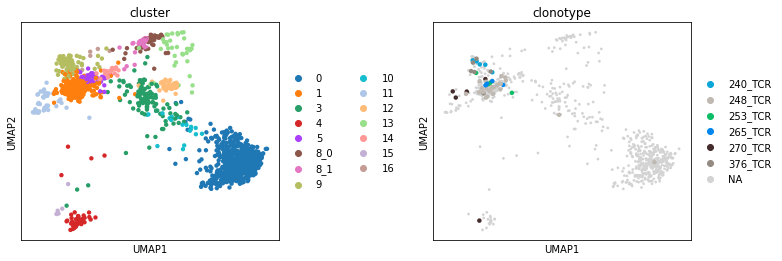

In [40]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), gridspec_kw={"wspace": 0.6})
sc.pl.umap(adata, color="cluster", ax=ax1, show=False)

sc.pl.umap(TCR_adata,color="clonotype",groups=clonotype_list,ax=ax2,size=[80 if c in clonotype_list else 30 for c in TCR_adata.obs["clonotype"]],)
#plt.savefig("")

... storing 'clonal_expansion_flag' as categorical


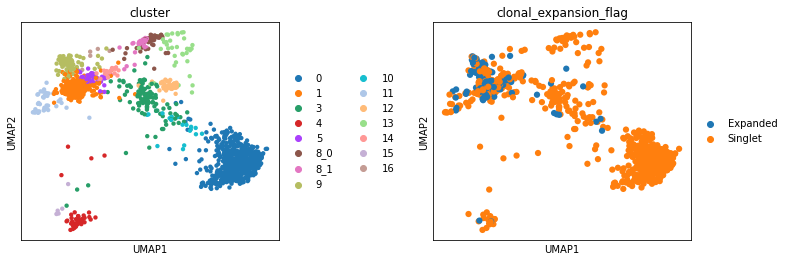

In [41]:
TCR_adata.obs["clonal_expansion_flag"] = np.where(TCR_adata.obs.clonal_expansion == "1","Singlet","Expanded")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), gridspec_kw={"wspace": 0.6})
sc.pl.umap(adata, color="cluster", ax=ax1, show=False)
sc.pl.umap(TCR_adata, color=["clonal_expansion_flag"], ax=ax2)

In [42]:
#temp_df=TCR_adata.obs
#total_cells = temp_df.groupby(['sample','cluster'])['orig.ident'].count().reset_index(name='Total_cells')
#ir_freq=temp_df.groupby(['sample','cluster'])['has_ir'].apply(lambda x: (x=='True').sum()).reset_index(name='has_ir')
#doublet_freq=temp_df.groupby(['sample','cluster'])['scrublet_predicted_doublet'].apply(lambda x: (x=='True').sum()).reset_index(name='doublet')
#clonotype_singlets=temp_df.groupby(['cluster'])['clonotype_size'].apply(lambda x: (x==1).sum()).reset_index(name='Singlets')
#clonotype_freq=temp_df.groupby(['cluster'])['clonotype_size'].apply(lambda x: (x>1).sum()).reset_index(name='Clonal_size_greater_than_1')
#df_temp = pd.merge(total_cells, doublet_freq, on=['cluster'])
#df_temp1 = pd.merge(df_temp, ir_freq, on=['cluster'])
#df_temp2 = pd.merge(df_temp1, clonotype_singlets, on=['cluster'])
#df = pd.merge(df_temp2, clonotype_freq, on=['cluster'])
#df

In [43]:
temp_df=TCR_adata.obs
total_cells = temp_df.groupby(['cluster'])['orig.ident'].count().reset_index(name='Total_cells')
ir_freq=temp_df.groupby(['cluster'])['has_ir'].apply(lambda x: (x=='True').sum()).reset_index(name='has_ir')
doublet_freq=temp_df.groupby(['cluster'])['scrublet_predicted_doublet'].apply(lambda x: (x=='True').sum()).reset_index(name='doublet')
clonotype_singlets=temp_df.groupby(['cluster'])['clonotype_size'].apply(lambda x: (x==1).sum()).reset_index(name='Singlets')
clonotype_freq=temp_df.groupby(['cluster'])['clonotype_size'].apply(lambda x: (x>1).sum()).reset_index(name='Clonal_size_greater_than_1')
df_temp = pd.merge(total_cells, doublet_freq, on=['cluster'])
df_temp1 = pd.merge(df_temp, ir_freq, on=['cluster'])
df_temp2 = pd.merge(df_temp1, clonotype_singlets, on=['cluster'])
df = pd.merge(df_temp2, clonotype_freq, on=['cluster'])
df

,cluster,Total_cells,doublet,has_ir,Singlets,Clonal_size_greater_than_1
0,0,358,0,358,356,2
1,1,154,0,154,83,71
2,3,68,0,68,62,6
3,4,24,0,24,22,2
4,5,27,0,27,20,7
5,8_0,25,0,25,24,1
6,8_1,3,0,3,2,1
7,9,42,0,42,19,23
8,10,12,0,12,10,2
9,11,24,0,24,19,5


In [44]:
#follicular_clusters = ['Follicular Th CXCL13+CBLB+', 'Follicular Th CXCR5+', 'Follicular Th TOX2+', 'CD200+TOX+']
#TCR_adata.obs['defined_cluster'] = np.where(TCR_adata.obs['cluster'].isin(follicular_clusters), "Follicular", "Non-Follicular")
#list(set(TCR_adata.obs['defined_cluster'].tolist()))

In [45]:
#ir.tl.define_clonotype_clusters(TCR_adata,sequence="aa",metric="alignment",same_v_gene="primary_only",key_added="ct_cluster_aa_alignment_same_v",)

In [46]:
# find clonotypes with more than one `clonotype_same_v`
#ct_different_v = TCR_adata.obs.groupby("ct_cluster_aa_alignment").apply(lambda x: x["ct_cluster_aa_alignment_same_v"].unique().size > 1)
#ct_different_v = ct_different_v[ct_different_v].index.values
#ct_different_v

In [47]:
#ir.tl.clonal_expansion(TCR_adata)
#sc.pl.umap(TCR_adata, color=["clonal_expansion"])

In [48]:
#ir.pl.clonal_expansion(TCR_adata, groupby="defined_cluster", clip_at=4, normalize=False)

In [49]:
#ir.pl.clonal_expansion(TCR_adata, "defined_cluster")

In [50]:
#ir.pl.group_abundance(TCR_adata, groupby="clonotype",target_col="defined_cluster", max_cols=10)

In [51]:
#ir.pl.group_abundance(TCR_adata, groupby="clonotype",target_col="defined_cluster", max_cols=10, normalize="sample")

In [52]:
#all_gene=TCR_adata.obs["IR_VDJ_1_v_gene"].to_list()
#gene_list=[t[0] for t in collections.Counter(all_gene).most_common(6) if str(t[0]) != 'nan']

#ir.pl.group_abundance(TCR_adata[TCR_adata.obs["IR_VDJ_1_v_gene"].isin(gene_list),:,],groupby="defined_cluster",target_col="IR_VDJ_1_v_gene",normalize=True,)

In [53]:
#ir.pl.spectratype(TCR_adata, color="defined_cluster", viztype="bar", fig_kws={"dpi": 120})

In [54]:
#ir.pl.spectratype(TCR_adata,color="defined_cluster",viztype="curve",curve_layout="shifted",fig_kws={"dpi": 120},kde_kws={"kde_norm": False},)

In [55]:
#temp_df=TCR_adata.obs
#total_cells = temp_df.groupby(['defined_cluster'])['orig.ident'].count().reset_index(name='Total_cells')
#ir_freq=temp_df.groupby(['defined_cluster'])['has_ir'].apply(lambda x: (x=='True').sum()).reset_index(name='has_ir')
#doublet_freq=temp_df.groupby(['defined_cluster'])['scrublet_predicted_doublet'].apply(lambda x: (x=='True').sum()).reset_index(name='doublet')
#clonotype_singlets=temp_df.groupby(['defined_cluster'])['clonotype_size'].apply(lambda x: (x==1).sum()).reset_index(name='Singlets')
#clonotype_freq=temp_df.groupby(['defined_cluster'])['clonotype_size'].apply(lambda x: (x>1).sum()).reset_index(name='Clonal_size_greater_than_1')
#df_temp = pd.merge(total_cells, doublet_freq, on=['defined_cluster'])
#df_temp1 = pd.merge(df_temp, ir_freq, on=['defined_cluster'])
#df_temp2 = pd.merge(df_temp1, clonotype_singlets, on=['defined_cluster'])
#df = pd.merge(df_temp2, clonotype_freq, on=['defined_cluster'])
#df

In [56]:
#TCR_adata.obs["site"] = TCR_adata.obs["sample"].str.slice(stop=-1)
#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), gridspec_kw={"wspace": 0.6})
#adata.obs['defined_cluster'] = np.where(adata.obs['cluster'].isin(follicular_clusters), "Follicular", "Non-Follicular")
#sc.pl.umap(adata, color="defined_cluster", ax=ax1, show=False)

#sc.pl.umap(TCR_adata,color="clonotype",groups=clonotype_list,ax=ax2,size=[80 if c in clonotype_list else 30 for c in TCR_adata.obs["clonotype"]],)

... storing 'clonal_expansion_flag' as categorical


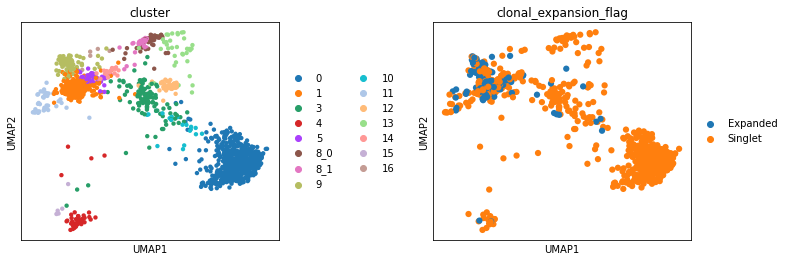

In [57]:
TCR_adata.obs["clonal_expansion_flag"] = np.where(TCR_adata.obs.clonal_expansion == "1","Singlet","Expanded")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), gridspec_kw={"wspace": 0.6})
sc.pl.umap(adata, color="cluster", ax=ax1, show=False)
sc.pl.umap(TCR_adata, color=["clonal_expansion_flag"], ax=ax2)

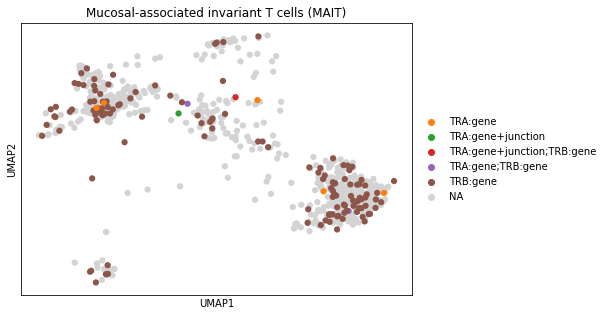

In [58]:
plt.rcParams['figure.figsize'] = 7,5
sc.pl.umap(
    TCR_adata, 
    color=["mait_evidence"], 
    groups=['TRA:gene', 'TRA:gene+junction', 'TRA:gene+junction;TRB:gene', 'TRA:gene;TRB:gene', 'TRA:junction', 'TRB:gene'],
    title="Mucosal-associated invariant T cells (MAIT)"
)

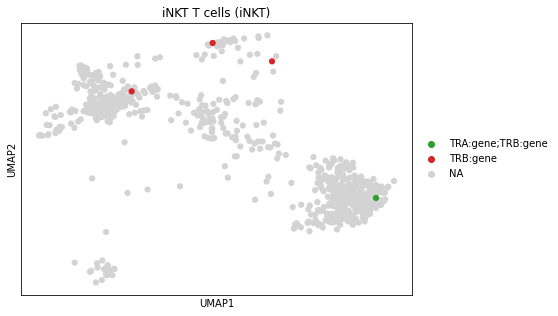

In [59]:
plt.rcParams['figure.figsize'] = 7,5
sc.pl.umap(
    TCR_adata, 
    color=["inkt_evidence"], 
    groups=['TRA:gene', 'TRA:gene;TRB:gene', 'TRB:gene'],
    title="iNKT T cells (iNKT)"
)

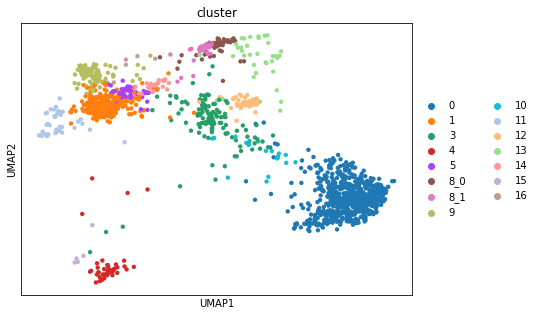

In [60]:
sc.pl.umap(adata, color="cluster")

In [61]:
set(TCR_adata.obs['clonal_expansion'].to_list())

{'1', '2', '>= 3'}

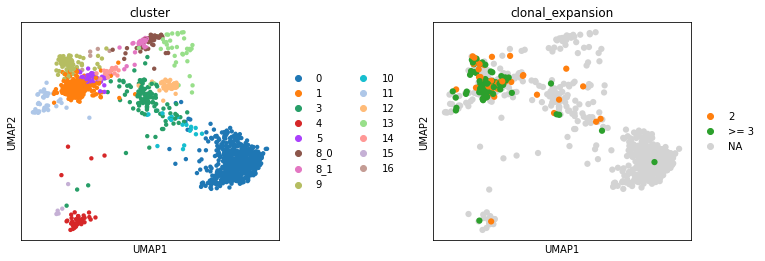

<Figure size 504x360 with 0 Axes>

In [62]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), gridspec_kw={"wspace": 0.6})
sc.pl.umap(adata, color="cluster", ax=ax1, show=False)
sc.pl.umap(
    TCR_adata, 
    color=['clonal_expansion'], 
    groups=['2', '>= 3'],
    title="clonal_expansion",
    ax=ax2
)
plt.savefig("umap_clonotype_expansion_including_2.png")

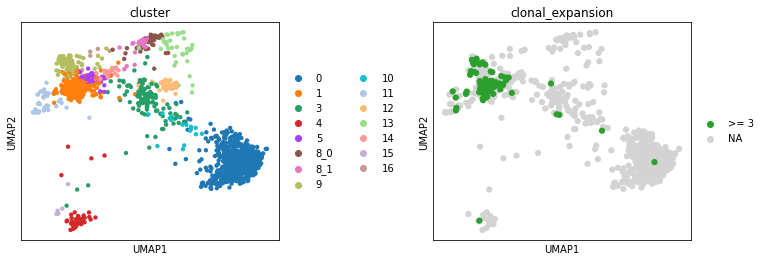

In [63]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), gridspec_kw={"wspace": 0.6})
sc.pl.umap(adata, color="cluster", ax=ax1, show=False)
sc.pl.umap(
    TCR_adata, 
    color=['clonal_expansion'], 
    groups=['>= 3'],
    title="clonal_expansion",
    ax=ax2, show=False
)
plt.savefig("umap_clonotype_expansion.png")

In [64]:
clonotype_list = TCR_adata.obs[TCR_adata.obs['clonal_expansion'] == '>= 3']['clonotype'].drop_duplicates().tolist()

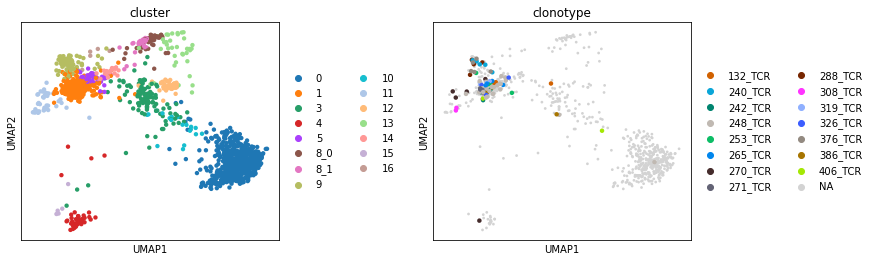

<Figure size 504x360 with 0 Axes>

In [65]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), gridspec_kw={"wspace": 0.6})
sc.pl.umap(adata, color="cluster", ax=ax1, show=False)

sc.pl.umap(TCR_adata,color="clonotype",groups=clonotype_list,ax=ax2,size=[80 if c in clonotype_list else 30 for c in TCR_adata.obs["clonotype"]],)
plt.savefig("umap_expanded_clonotype.png")

In [66]:
TCR_adata.obs.to_csv("scirpy_tcr_output.tsv")